<a href="https://colab.research.google.com/github/saqlainkazi690/Projects/blob/main/Dogs_vs_Cats_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:08<00:00, 126MB/s]
100% 812M/812M [00:08<00:00, 98.4MB/s]


In [4]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [7]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.7781.jpg', 'cat.3820.jpg', 'dog.5315.jpg', 'cat.12224.jpg', 'cat.10703.jpg', 'dog.3614.jpg', 'cat.3907.jpg', 'dog.9968.jpg', 'dog.12021.jpg', 'cat.7154.jpg', 'dog.237.jpg', 'cat.11030.jpg', 'cat.6179.jpg', 'cat.9707.jpg', 'cat.6528.jpg', 'dog.7284.jpg', 'dog.11485.jpg', 'cat.3985.jpg', 'dog.4420.jpg', 'cat.11084.jpg', 'dog.8325.jpg', 'cat.4688.jpg', 'dog.7106.jpg', 'dog.1577.jpg', 'dog.3022.jpg', 'dog.2744.jpg', 'dog.9988.jpg', 'cat.11877.jpg', 'cat.1662.jpg', 'cat.8817.jpg', 'dog.11032.jpg', 'cat.3299.jpg', 'cat.9823.jpg', 'cat.11241.jpg', 'dog.11306.jpg', 'cat.11119.jpg', 'cat.7056.jpg', 'dog.744.jpg', 'dog.10414.jpg', 'dog.2205.jpg', 'cat.11360.jpg', 'dog.2436.jpg', 'dog.6738.jpg', 'cat.5649.jpg', 'dog.10911.jpg', 'cat.5665.jpg', 'dog.3631.jpg', 'cat.11452.jpg', 'dog.1396.jpg', 'dog.3944.jpg', 'dog.10091.jpg', 'dog.2333.jpg', 'cat.10322.jpg', 'dog.5484.jpg', 'dog.7128.jpg', 'cat.5143.jpg', 'cat.10555.jpg', 'cat.10786.jpg', 'cat.5070.jpg', 'cat.1138.jpg', 'dog.6695.jpg', 'dog.9

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

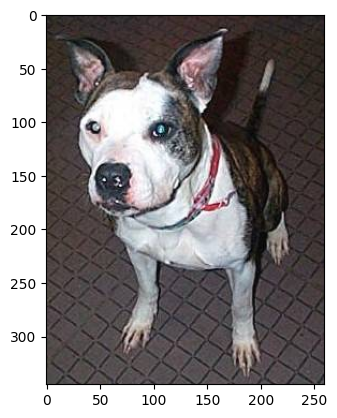

In [9]:
#dog image
img = mpimg.imread('/content/train/dog.3687.jpg')
imgplt = plt.imshow(img)
plt.show()

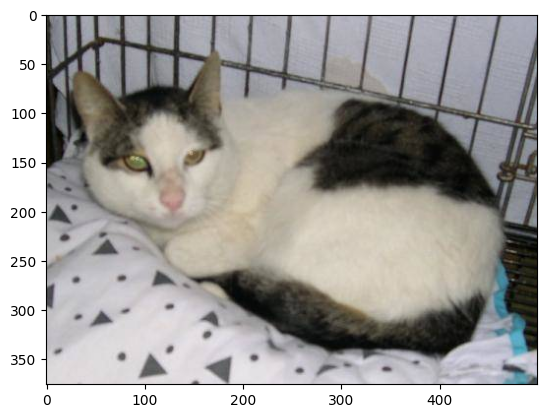

In [10]:
#cat image
img = mpimg.imread('/content/train/cat.7760.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


cat
cat
dog
cat
cat


In [12]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [13]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [15]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [16]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 987 1013]


In [17]:
import cv2
import glob

In [18]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [19]:
X = dog_cat_images
Y = np.asarray(labels)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [22]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

In [24]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [25]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [27]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.3024 - acc: 0.8637
Epoch 2/5
50/50 [==============================] - 75s 1s/step - loss: 0.0778 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 76s 2s/step - loss: 0.0600 - acc: 0.9800
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0473 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 61s 1s/step - loss: 0.0391 - acc: 0.9906


In [28]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0788 - acc: 0.9750
Test Loss = 0.07877076417207718
Test Accuracy = 0.9750000238418579
